## Machine Learning and Statistics Project - Boston House Price Dataset
![Numpy](https://cdn-images-1.medium.com/max/1200/1*L0yNfRdiH8DfYuiJTKPxww.png)

The Boston Housing dataset contains US census data published in 1978 of houses in various parts of Boston. The dataset contains information on 505 samples with 12 measurements for each sample. The samples are contained in the rows of the dataset and the measurements in the columns. 

The following is analysis of the dataset using descriptive and inferential statistics:

In [1]:
import numpy as np  # import numnerical python with shorthand  
import matplotlib.pyplot as plt  # shorthand import for matplotlib library
import seaborn as sns # import seaborn for advanced graphics
import pandas as pd # import pandas for data structures and operations for manipulating numerical tables and time series
import sklearn # for Machine Learning in Python
import scipy.stats as stats # statisitcal function
import statsmodels.api as sm # conducting statistical tests, and statistical data exploration
%matplotlib inline 
from matplotlib import rcParams # improved plots from matplotlib
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn import svm # support vector classification

The Boston House Price Dataset is loaded into the jupyter notebook from the scikit learn library

In [2]:
# Load the Boston House Price dataset from scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
#Print the values of the Boston dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses

target: prices of the house

feature_names: names of the features

DESCR: describes the dataset

Describe the shape of the dataset rows, columns

In [4]:
# Give the description of the dataset
print(boston_dataset.data.shape)

(506, 13)


Print the first five rows of the dataset

In [5]:
#Print the header of the Boston dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Give a description of what is contained in each column

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

MEDV value in attribute called target . So let’s check the shape of the boston.target.

In [48]:
boston['MEDV'] = boston_dataset.target
# Add MEDV value to the dataset

In [8]:
print(boston.head())
# Dataframe with price

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Descriptive Statistics

Calculate the minimum, maximum, mean, median, and standard deviation of 'MEDV', which is stored in prices.

In [44]:
minimum_price = np.min(boston.MEDV) # Minimum price of the data
maximum_price = np.max(boston.MEDV) # maximum price of the data
mean_price = np.mean(boston.MEDV) # mean price of the data
median_price = np.median(boston.MEDV) # median price of the data
std_price = np.std(boston.MEDV) # standard deviation of the house prices


# Show the calculated statistics
print ("The lowest house price is:", minimum_price)
print ("The highest house price is:", maximum_price)
print ("The average house price is:", mean_price)
print ("The median house price is:", median_price)
print ("The standard deviation of houses prices is:", std_price)

The lowest house price is: 5.0
The highest house price is: 50.0
The average house price is: 22.532806324110698
The median house price is: 21.2
The standard deviation of houses prices is: 9.188011545278206


Plot histograms of the variables within the dataset as a visual representation 

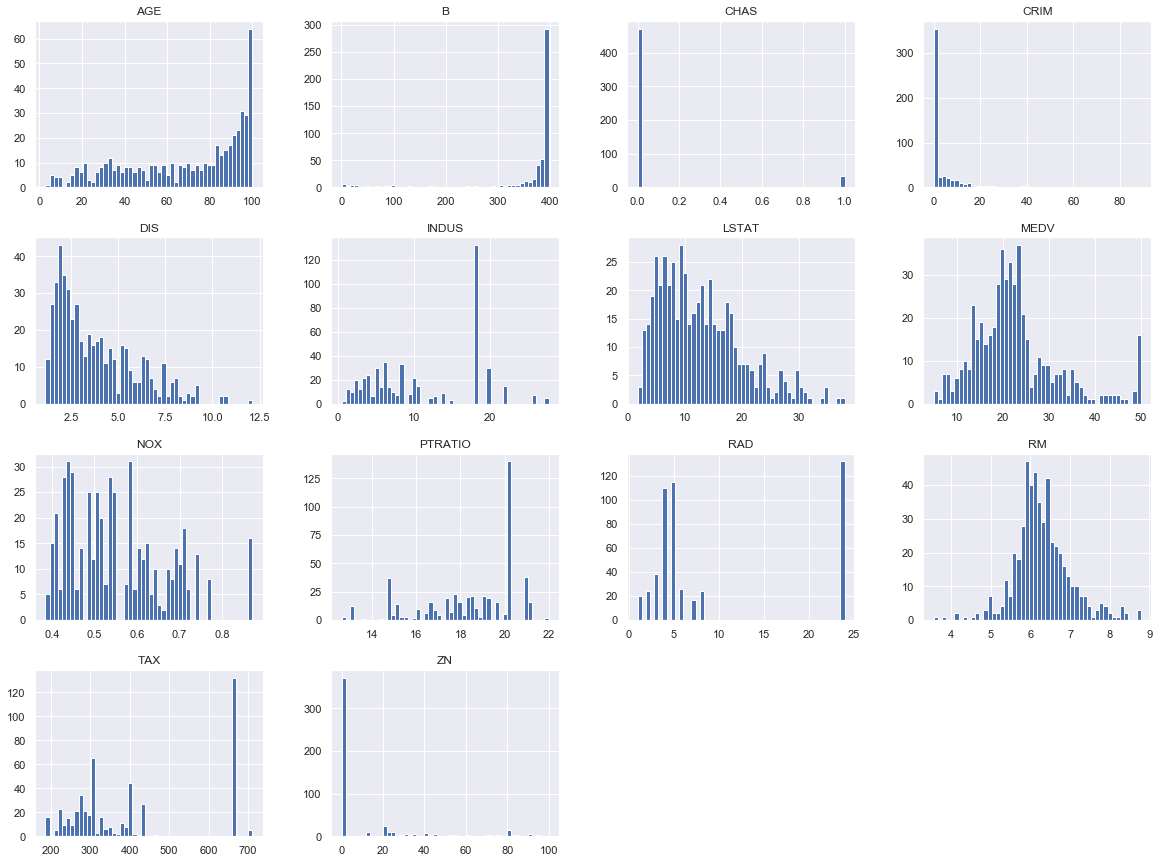

In [30]:
boston.hist(bins=50, figsize=(20,15))
plt.show()

Plot the house prices to show distribution of prices

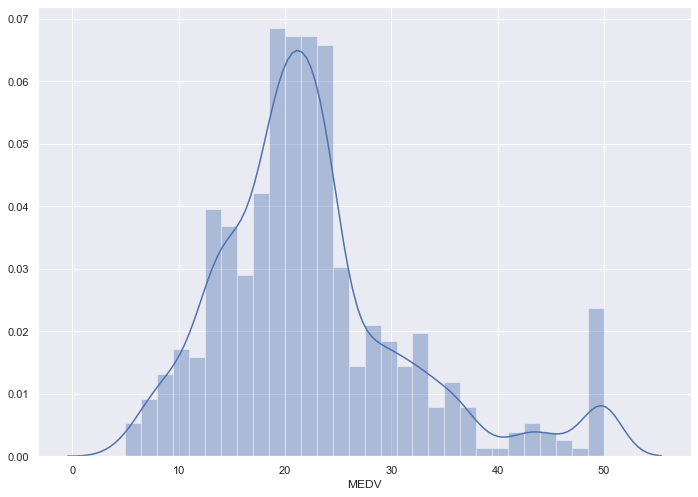

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

## Correlation Heatmap
Heatmap showing the correlation matrix meausing the linear relationships between the variables of the dataset

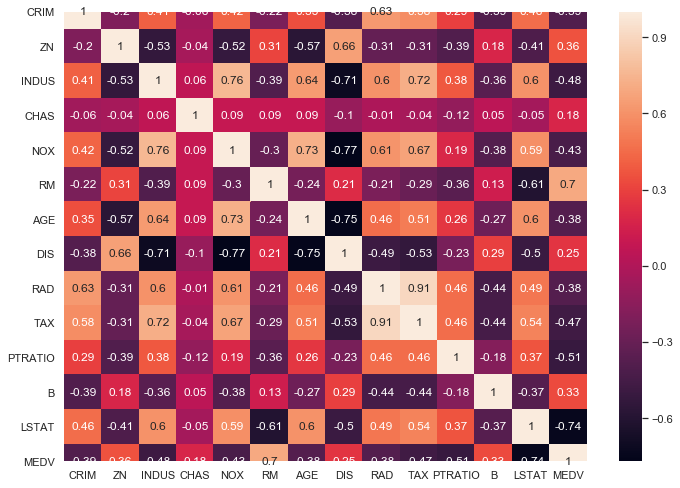

In [10]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Observations
The correlation coefficient runs on a scale of -1 to 1, 1 having stong correlation and -1 showing no correlation. MEDV shows a strong cprrelation to the RM value indicating a higher house price for a dwelling with a larger number of rooms. 

It shows negative correlation to LSTAT, lower status withing the population.

## Linear Regression

LSAT (Percentage of lower status of the population) was selected for the linear regression module as it showed the stongest negative correlation with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. It shows that the house prices are negatively correlated linearly with the status within the population.

In [42]:
sns.lmplot(x="boston.MEDV",y="boston.LSAT",data=boston)
plt.show()

KeyError: "None of [Index(['boston.LSAT', 'boston.MEDV'], dtype='object')] are in the [columns]"

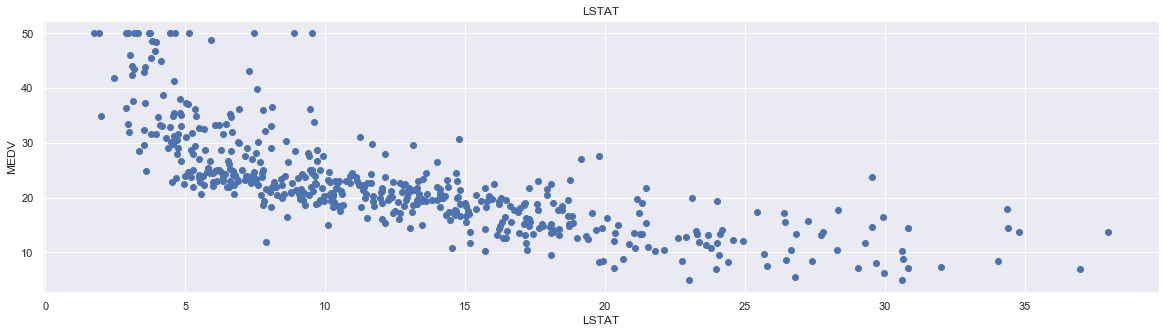

In [11]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Positive Correlation


RM (Average number of rooms per dwelling) was selected due to its strong positive correlation with with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. 

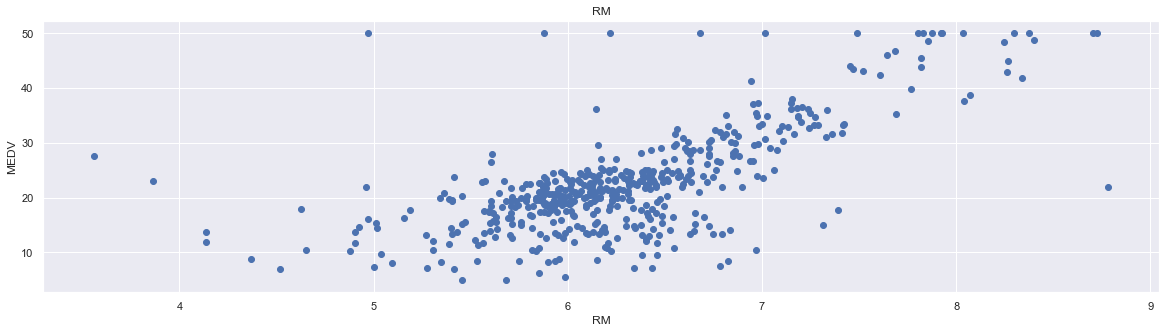

In [12]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

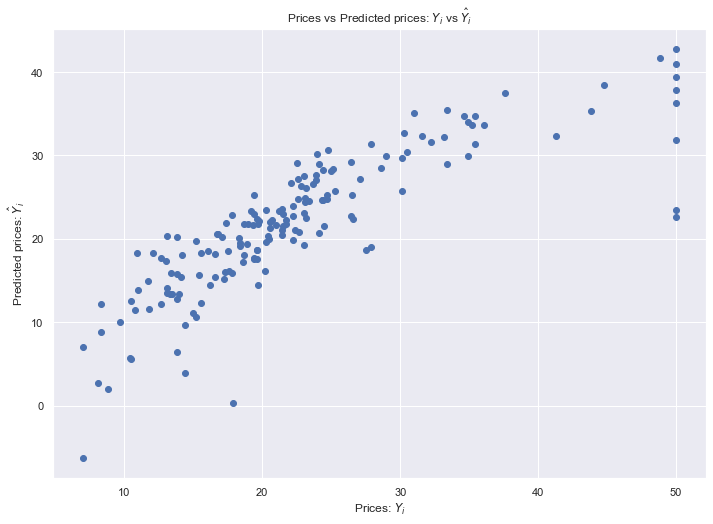

In [16]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean Squared Error

In [17]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.53045876597468


## Observation
House prices generally increase linearly with the number of rooms in the house. There are some outliers in the data. The maximum value in the databases is 50.

<function matplotlib.pyplot.show(*args, **kw)>

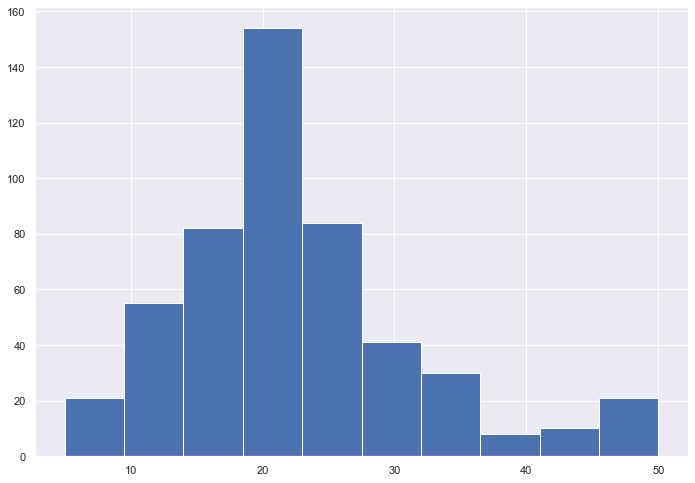

In [18]:
# Histogram of house prices
plt.hist(target)
plt.show

## Inferential Statistics
Analysis of whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

![Keras](https://miro.medium.com/max/1000/1*LkKz4wtZNBo5i-Vc8DWhTA.png)

Create a neural network to predict the median house price based on the other variables in the dataset.

The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. 

In [19]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [20]:
inputs = boston[['RM', 'LSAT', 'PTRATIO']] 
inputs

KeyError: "['LSAT'] not in index"

In [ ]:
output = boston['MEDV']
output

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras as kr

In [ ]:
# Create a new neural network.
m = kr.models.Sequential()

In [ ]:
# Add neurons.
# m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

In [ ]:
# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
# Train the model.
m.fit(inputs, output, epochs=15, batch_size=10)

In [ ]:
# Run each x value through the neural network.
p = m.predict(inputs)

In [ ]:
# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

In [ ]:
# Create some input values
x =np.arrange(0.0, 10.0, 1)

#Run each x value through the neuaral network

In [ ]:
# Plot the values
plt.plot(x, y, 'k.')